In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
df = pd.read_csv('data_gn_challenge.csv')

In [16]:
df.head()

,project_id,x,y,y2
0,6,20494.935542,0.999821,0.000179
1,6,20746.047063,0.999821,0.000179
2,6,20986.656735,0.999813,0.000187
3,6,21259.179906,0.999836,0.000164
4,6,21521.609276,0.999842,0.000158


In [17]:
df.x = df.x/85000

In [18]:
df.head()

,project_id,x,y,y2
0,6,0.241117,0.999821,0.000179
1,6,0.244071,0.999821,0.000179
2,6,0.246902,0.999813,0.000187
3,6,0.250108,0.999836,0.000164
4,6,0.253195,0.999842,0.000158


In [105]:
df8 = df[df.project_id == 8]

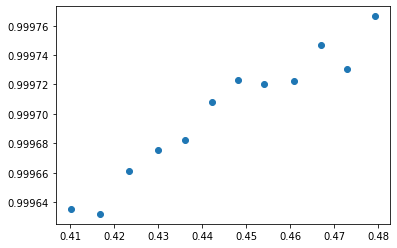

In [106]:
plt.scatter(df8.x[0:12], df8.y[0:12])
# plt.scatter(df8.x, df8.y)

In [107]:
def gauss_newton(X, Y, f, de_dp, P_init, P_acc):
    assert len(X) == len(Y), "The length of X and Y should match"
    assert len(de_dp) == len(P_init), "The number of parameters and partial derivatives should match"
    
    J = np.zeros(shape=(len(X), len(de_dp)))
    E = np.zeros(shape=(len(X), 1))
    
    P_cur = P_init
    
    while True:
        for i in range(len(X)):
            for j in range(len(de_dp)):
                J[i][j] = de_dp[j](P_cur, X[i])
            E[i] = Y[i] - f(P_cur, X[i])

        pinvJ = np.linalg.pinv(J)
        step = np.matmul(pinvJ, E)
        P_next = np.subtract(P_cur, step)
        P_abs_diff = np.linalg.norm(np.subtract(P_cur, P_next))
        if P_abs_diff < P_acc:
            return P_next
        P_cur = P_next 

In [108]:
# P - the vector of parameters to optimize over

def f(P, x):
    a, b, c = P
    return a * math.exp(b * (x + a)) + c

# e = y - f(P, x)
    
def de_da(P, x):
    a, b, c = P
    return - math.exp(b * (x + a)) * (a * b + 1)

def de_db(P, x):
    a, b, c = P
    return - a * a * math.exp(b * (x + a))

def de_dc(P, x):
    return -1.

In [126]:
X = df8.x[0:12].tolist()
Y = df8.y[0:12].tolist()
P_init = np.array([[-0.1], [-20.], [1.]])
de_dp = [de_da, de_db, de_dc]
P_acc = 1e-14
P_ans = gauss_newton(X, Y, f, de_dp, P_init, P_acc)
print(P_ans)

[[ -0.09462805]
 [-19.99998218]
 [  0.99979408]]


In [127]:
Y_ans = [f(P_ans, x) for x in X]

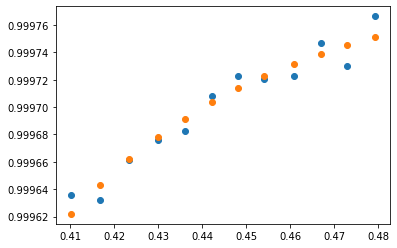

In [128]:
plt.scatter(X, Y)
plt.scatter(X, Y_ans)

In [129]:
y_mean = np.mean(Y)
SS_res = 0
SS_tot = 0
for i in range(len(Y)):
    SS_res += (Y[i] - Y_ans[i]) ** 2
    SS_tot += (Y[i] - y_mean) ** 2
R2 = 1 - SS_res / SS_tot
print(R2)

[0.94429536]
